# Machine Learning Recipes – Fundamentals of ML

## *Henry Shires, adapted from Google Developers*

### Prerequisites (see .\requirements.txt)
- Python 3.6 or later
- [Scikit-Learn](https://scikit-learn.org)
- [TensorFlow](https://tensorflow.org)
- NumPy
- MatPlotLib

### Resources
- [Introduction to Machine Learning](https://towardsdatascience.comintroduction-to-machine-learning-db7c668822c4)
- [Google Developers ML Recipes](https://www.youtube.com/playlist?list=PLOU2XLYxmsIIuiBfYad6rFYQU_jL2ryal)
- [Unity ML Agents](https://www.youtube.com/watch?v=32wtJZ3yRfw&index=2&list=PLX2vGYjWbI0R08eWQkO7nQkGiicHAX7IX&t=0s)
- [Neural Networks Playground](https://playground.tensorflow.org)

### Recipe 1: Simple Classifier - Apples and Oranges

Hello World (Determining the difference between an apple and an orange):

- **Classifier:** A function that inputs data and assigns it a label as an output. This uses algorithms such as <mark>Supervised Learning</mark>. A classifier is like a “box of rules” determined by Training Data and gives an output based on a set of rules.
- **Supervised Learning:** A technique to write a classifier automatically. It creates it by finding patterns in objects and data inputs. Libraries that include this functionality for developers are scikit-learn
- This script performs the basic process for applying a machine learning algorithm to a dataset:
- The four steps are:
    - 1. Download a dataset (using pandas)
    - 2. Process the numeric data (using NumPy)
    - 3. Train and evaluate learners (using scikit-learn or TensorFlow)
    - 4. Plot and compare results (using matplotlib)


In [11]:
from sklearn import tree

# Training data
# Input, 0 = bumpy, 1 = smooth
features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# Output, 0 = apple, 1 = orange
labels = [0, 0, 1, 1]

# Defines type of classifier
clf = tree.DecisionTreeClassifier()

# Defines our Learning Algorithm (fit is for "Finding patterns in Data")
clf = clf.fit(features, labels)

# Inference
p = clf.predict([[90, 0]])

if p == 0: print("Apple")
elif p == 1: print("Orange")
else: print("Error predicting")

Apple


In [12]:
# 1. import data set
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
'''
# print info from set
print(iris.feature_names) # metadata
print(iris.target_names)
print(iris.data[0]) # features
print(iris.target[0]) # labels
'''

testIdx = [0, 50, 100]  # each index where a new set of flowers begin

# training data
trainTarget = np.delete(iris.target, testIdx)
trainData = np.delete(iris.data, testIdx, axis=0)

# testing data
testTarget = iris.target[testIdx]
testData = iris.data[testIdx]

# classifier
clf = tree.DecisionTreeClassifier()
clf.fit(trainData, trainTarget)

print(testTarget)  # what our label is expected to be
print(clf.predict(testData))

print(testData[0], testTarget[0])

[0 1 2]
[0 1 2]
[5.1 3.5 1.4 0.2] 0


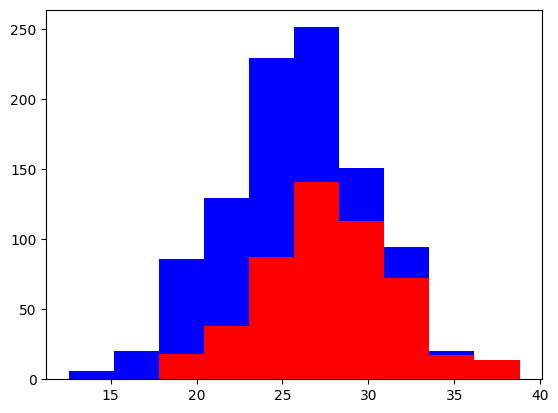

In [13]:
import numpy as np
import matplotlib.pyplot as plt

greyhounds = 500  # sample population
labs = 500

greyHeight = 28 + 4 * np.random.randn(
    greyhounds)  # change to make it realistic for actual data, but random ints added to increase variation
labHeight = 24 + 4 * np.random.randn(labs)  # random adds height to entire population

plt.hist([greyHeight, labHeight], stacked=True, color=['r', 'b'])  # Histogram to represent data
plt.show()

In [14]:
from scipy.spatial import distance


def euc(a, b):
    return distance.euclidean(a, b)  # calculate point distance


class ScrappyKNN():  # Our classifier (Scrappy = bare-bones)
    def fit(self, x_train, y_train):  # takes the features and labels as input
        self.x_train = x_train  # features
        self.y_train = y_train  # labels

    def predict(self, x_test):  # inputs the features from testing data and outputs predictions
        predictions = []  # returning list of predictions
        for row in x_test:
            label = self.closest(row)  # finds closest training point from test point
            predictions.append(label)
        return predictions

    def closest(self, row):  # loops over all of training points and updates to the closest one so far
        bestDist = euc(row, self.x_train[0])  # records best distance from testing point to training point
        bestIndex = 0  # records the best index
        for i in range(len(self.x_train)):
            dist = euc(row, self.x_train[i])
            if dist < bestDist:
                bestDist = dist
                bestIndex = i
        return self.y_train[bestIndex]


from sklearn import datasets

iris = datasets.load_iris()

x = iris.data  # features
y = iris.target  # labels

from sklearn.model_selection import train_test_split

# a built in function that allows for automated train/test splitting of the data.
# features and label values are used, and 'test_size' defines how much of the data is split into train or test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

# from sklearn.neighbors import KNeighborsClassifier # train a new type of classifier
clf = ScrappyKNN()  # sets classifier var to class


def results(prediction):  # converts results to readable strings
    data = prediction
    for i in range(len(data)):
        if predict[i] == 0:
            data[i] = "setosa"
        elif predict[i] == 1:
            data[i] = "versicolor"
        elif predict[i] == 2:
            data[i] = "virginica"
    return data


clf.fit(x_train, y_train)
predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict))

results = results(predict)
print(results)  # this prints the type of iris the classifier predicts for each row of testing data

'''
customData = [5.1, 3.5, 1.4, 0.2]
customPredict = clf.predict(customData)
customResults = results(customPredict)
print(customResults)
'''

0.96
['setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor', 'virginica', 'virginica', 'setosa', 'setosa', 'versicolor']


'\ncustomData = [5.1, 3.5, 1.4, 0.2]\ncustomPredict = clf.predict(customData)\ncustomResults = results(customPredict)\nprint(customResults)\n'

In [15]:
# CODE FORKED FROM @TENSORFLOW/TENSORFLOW. DO NOT DISTRIBUTE WITHOUT EDITING.

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

# Import the dataset
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]


# Display some digits
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.gray_r)


for i in range(len(data)):
    display(i)

# lists features
print(len(data[0]))

# Fit a Linear Classifier
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns=feature_columns, n_classes=10)
classifier.fit(data, labels, batch_size=100, steps=1000)

# Evaluate accuracy
results = classifier.evaluate(test_data, test_labels)
print(results, "Accuracy")

predict = classifier.predict((test_data[0]), (test_labels[0]))

# here's one it gets right
print("Predicted %d, Label: %d" % (predict))
display(0)
# one it gets wrong
predict = classifier.predict((test_data[8]), (test_labels[8]))

print("Predicted %d, Label: %d" % (predict))
display(8)

# Let's see if we can reproduce the pictures of the weights in the TensorFlow Basic MNSIT
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())  # ticks be gone
    a.set_yticks(())
plt.show()

AttributeError: module 'tensorflow' has no attribute 'contrib'

In [16]:
# For Python 2 / 3 compatability
from __future__ import print_function

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
training_data = [
    ["Green", 3, "Apple"],
    ["Yellow", 3, "Apple"],
    ["Red", 1, "Grape"],
    ["Red", 1, "Grape"],
    ["Yellow", 3, "Lemon"],
    ["Red", 3, "Apple"],
    ["Red", 3, "Apple"],
]

# print the tree
header = ["color", "diameter", "label"]


# print(header)


def unique_vals(rows, col):
    # Find the unique values for a column in a dataset.
    return set([row[col] for row in rows])


# unique_vals(training_data, 0)
# returns column 0 of training data

def class_counts(rows):
    # Counts the number of each type of example in a dataset.
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


# class_counts(training_data)
# returns how many times a label is present

def is_numeric(value):
    """Test if a value is numeric. (E.g Distinguish color names from diameter)"""
    return isinstance(value, int) or isinstance(value, float)


# Demo
# is_numeric(7)

# Represents how a question is determined
class Question:
    """A Question is used to partition a dataset.

    This class just records a 'column number' (e.g., 0 for Color) and a
    'column value' (e.g., Green). The 'match' method is used to compare
    the feature value in an example to the feature value stored in the
    question. See the demo below.
    """

    def __init__(self, column, value):
        # stores for the threshold used to partition the data
        self.column = column  # string of type of feature
        self.value = value  # value of the given node in the table

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        # print(val) prints the feature at self.column and the given index of training_data
        if is_numeric(val):  # returns boolean values
            return val >= self.value
        else:
            return val == self.value

    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format.
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))


# Prints example questions
q = Question(0, 'Green')  # Is color == Green?
print(q)
print(Question(1, 3))  # Is diameter >= 3?

# An example from the training set to see if it matches the question
example = training_data[0]
print(q.match(example))  # this will be true, since the first example is Green.


def partition(rows, question):
    """Partitions a dataset.

    For each row in the dataset, check if it matches the question. If
    so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:  # If the question is true for the given data, place it in true, otherwise it's false
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


# Partition the training data based on whether rows are Red.
true_rows, false_rows = partition(training_data, Question(0, 'Red'))


# print(true_rows) Contains rows with Red

def gini(rows):
    """Calculate the Gini Impurity for a list of rows.

    There are a few different ways to do this, this one was
    the most concise. See:
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl ** 2
    return impurity


# First, we'll look at a dataset with no mixing.
no_mixing = [['Apple'],
             ['Apple']]
# this will return 0
print(gini(no_mixing))

some_mixing = [['Apple'],
               ['Orange']]
# this will return 0.5 - meaning, there's a 50% chance of misclassifying
# a random example we draw from the dataset.
print(gini(some_mixing))

lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
print(gini(lots_of_mixing))


def info_gain(left, right, current_uncertainty):
    """Information Gain.

    The uncertainty of the starting node, minus the weighted impurity of
    two child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)


# Calculate the uncertainy of our training data.
current_uncertainty = gini(training_data)
print(current_uncertainty)


def find_best_split(rows):
    """Find the best question to ask by iterating over every feature / value
    and calculating the information gain."""
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our
            # toy dataset.
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question


# Find the best question to ask first for our toy dataset.
best_gain, best_question = find_best_split(training_data)
print(best_question)


class Leaf:
    """A Leaf node classifies data.

    This holds a dictionary of class (e.g., "Apple") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)


class Decision_Node:
    """A Decision Node asks a question.

    This holds a reference to the question, and to the two child nodes.
    """

    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch


def build_tree(rows):
    """Builds the tree.

    Rules of recursion: 1) Believe that it works. 2) Start by checking
    for the base case (no further information gain). 3) Prepare for
    giant stack traces.
    """

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)


# Recieves the entire training set as input
my_tree = build_tree(training_data)
print(my_tree)


def classify(row, node):
    """See the 'rules of recursion' above."""

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)


# training data is an apple with confidence 1.
print(classify(training_data[0], my_tree))


def print_leaf(counts):
    """A nicer way to print the predictions at a leaf."""
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs


# Printing that a bit nicer
print(print_leaf(classify(training_data[0], my_tree)))

# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

for row in testing_data:
    print("Actual: %s. Predicted: %s" %
          (row[-1], print_leaf(classify(row, my_tree))))

Is color == Green?
Is diameter >= 3?
True
0.0
0.5
0.7999999999999998
0.5714285714285715
Is diameter >= 3?
{'Apple': 3}
{'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}
